In [74]:
import datetime as dt
import matplotlib.pyplot as plt 
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import pickle
import os

import urllib.request
from bs4 import BeautifulSoup
import requests
import numpy as np
import re


In [75]:
style.use('ggplot')
start = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)
#pandas datareader read for the share tesla "TEsla" and returns the dataframee with important values
# his works because yahoo offers a finance api
df = web.DataReader('TSLA','yahoo',start,end)   # change company index to retireve for other companies

df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


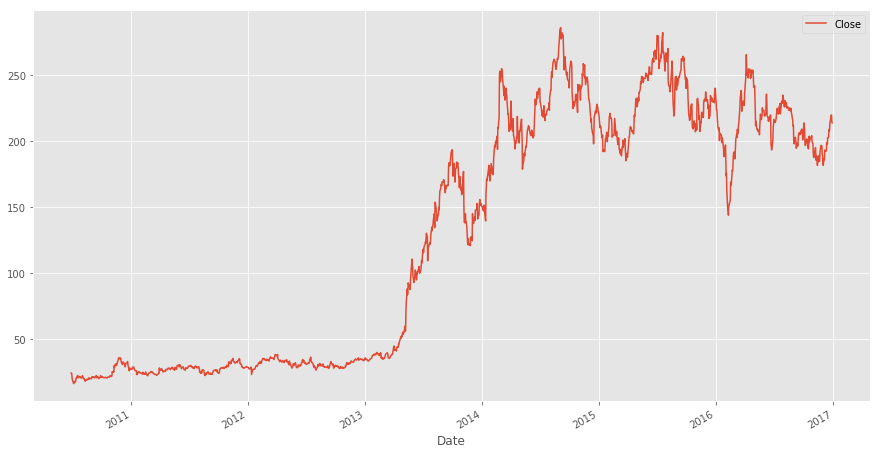

In [9]:
# plt.figure(figsize=(15,8))
df.plot(y='Close',figsize=(15,8)) # plot using df builtin plt handler
plt.show()

#### Moving average
Lets plot a moving average for the close price for tesla stock:

In [10]:
#adding new col containing moving average:

df['MA'] = df['Adj Close'].rolling(window=100).mean()


In [11]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,MA
Date,,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999,NaN
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000,NaN
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999,NaN
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001,NaN
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001,NaN


In [12]:
df.dropna(inplace=True)
# df.fillna(value=0)   # also can be used

In [13]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,MA
Date,,,,,,,
2010-11-17,30.750000,28.610001,30.200001,29.490000,750000,29.490000,20.9879
2010-11-18,30.740000,28.920000,30.670000,29.889999,956100,29.889999,21.0479
2010-11-19,31.370001,29.700001,30.160000,30.990000,1150500,30.990000,21.1195
2010-11-22,33.450001,31.500000,31.570000,33.400002,1529700,33.400002,21.2339
2010-11-23,35.680000,32.189999,33.290001,34.570000,1577800,34.570000,21.3876


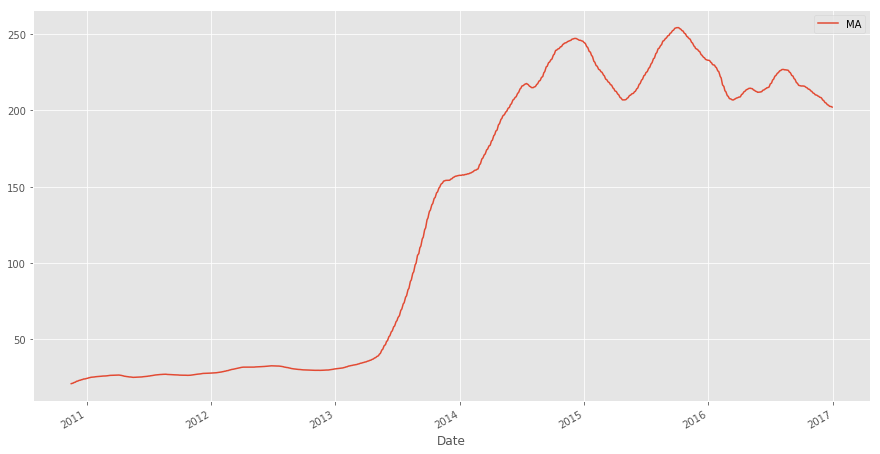

In [14]:
df.plot(y='MA',figsize=(15,8)) # plot using df builtin plt handler
plt.show()

In [15]:
# Plotting multiple grapsh in a single figure in matplotlib :

<BarContainer object of 1541 artists>

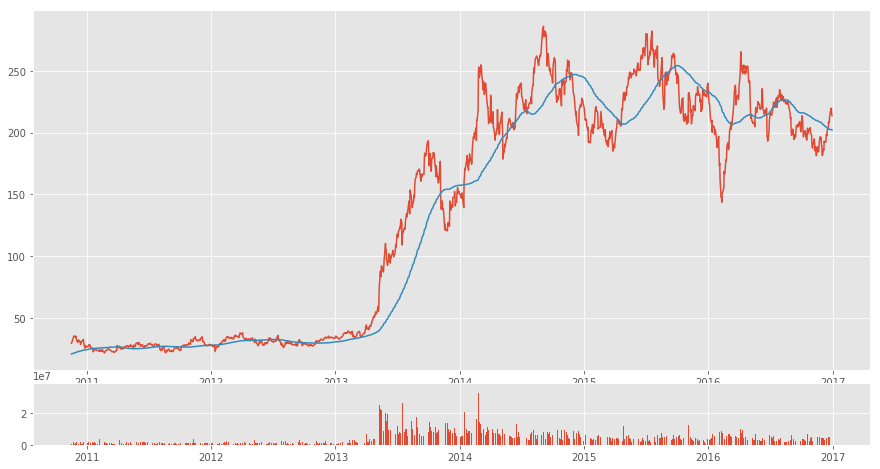

In [30]:
plt.figure(figsize=(15,8))
ax1 = plt.subplot2grid((6,1),(0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0), rowspan=1, colspan=1,sharex=ax1)  #sharex is used in subplot graph, so that whn zoomed in one graph, the reference graph also zooms in or move or other operations 

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['MA'])

ax2.bar(df.index,df['Volume'])

# Get SAP 500 companies list from web : 
* First get  the list in an array, then use *datareader* api to get the OHLC values.

In [24]:
import urllib.request
from bs4 import BeautifulSoup
import requests
import numpy as np
import re


### Naive method :

In [149]:
# Naive method : 
page_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
html = urllib.request.urlopen(page_url).read()
soup = BeautifulSoup(html, 'html.parser') 
tables = soup.findAll('td')
company_index=np.arange(0,len(tables),9)
company_names = []

for i in company_index :
    if len(company_names)<500:
        company_names.append(tables[i].text.strip())
    else:
        break
        
# better method :
import pickle
def save_sap500_tickers():
    page_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    html = urllib.request.urlopen(page_url).read()
    soup = BeautifulSoup(html, 'html.parser')
    table = soup.find('table',attrs={'class':'wikitable sortable'})
    tickers =[   ]
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        mapping = str.maketrans(".","-")      #changing the string before appending
        ticker=ticker.translate(mapping)
        if ticker== 'LIN' :
            pass
        if ticker== 'PPG' :
            pass
        else:
            tickers.append(ticker)
    # method to save this array as a file :
    with open("sp500.pickle",'wb') as f:
        pickle.dump(tickers,f)
    #print(tickers)
    return tickers
save_sap500_tickers()

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AMG',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'AGN',
 'ADS',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'APC',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ARNC',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BHGE',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BBT',
 'BDX',
 'BRK-B',
 'BBY',
 'BIIB',
 'BLK',
 'HRB',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BHF',
 'BMY',
 'AVGO',
 'BR',
 'BF-B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CAT',
 'CBOE',
 'CBRE',
 'CBS',
 'CELG',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'XEC',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH

In [155]:
len(save_sap500_tickers())

504

### Method using Pandas :

In [107]:
df = pd.read_html(page_url,header=0)
df[0].head()


,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Location,Date first added[3][4],CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


# GET pricing data of all shares in the ticker :

In [157]:
def get_data_sap500(reload_ticker=False):
    
    if reload_ticker:
        tickers = save_sap500_tickers()
    else:
        with open('sp500.pickle','rb') as f:
            tickers = pickle.load(f)
    start = dt.datetime(2000,1,1)
    end = dt.datetime(2016,12,31)
    
    if not os.path.exists('stock_data'):
        os.mkdir('stock_data')
    
    for i in tickers:
        if not os.path.exists('stock_data/{}.csv'.format(i)):
# EVRG was giving an error. so to except:     
            if i =='EVRG':
                pass
            
            else:
            
                df = web.DataReader(i,'yahoo',start,end)
                df.to_csv('stock_data/{}.csv'.format(i))
            
        else:
            print('{} exists already'.format(i))
# get_data_sap500()


# Merge all the csv files to one dataframe :

In [72]:
def compile_data():
    with open('tickers.pickle','rb') as f :
        tickers = pickle.load(f)
    main_df = pd.DataFrame() #@ empty
    
    for count,ticker in enumerate(tickers):
                  
        df = pd.read_csv('stock_data/{}'.format(ticker))
        df.set_index('Date',inplace = True)

        df.rename(columns = {'Adj Close':ticker},inplace =True)
        # this function saves in the main_df all the 'ADJ CLOSE' values for all companies.
        """To use it to save other coloumns, exclude in .drop to use the coloum."""
        df.drop(['Open','High','Low','Close','Volume'],1,inplace=True)

        if main_df.empty :
            main_df = df
        else:
            main_df = main_df.join(df,how='outer')

        if count % 10 ==0:
            print(count)
    return main_df

In [62]:
def read_file_names(): 
    cwd = os.getcwd()
    path = os.path.join(cwd,'stock_data')
    file_names = []
    for root_dir, sub_dirs, files in os.walk(path):
        for i in files:
            file_names.append(i)
#         print(file_names)
    with open('tickers.pickle','wb') as f:
        pickle.dump(file_names,f)
    return file_names

In [71]:
# df=compile_data()

In [73]:
df.head()
df.to_csv('joined_adj_close.csv')

# Correlation table for all companies

In [79]:
def heat_map():
    df = pd.read_csv('joined_adj_close.csv')
    df_correlation = df.corr()
    # data which is to be plotted on heatmap
    data = df_correlation.values
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    heatmap = ax.pcolor(data,cmap=plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    #set the points where the labels will finally be put
    ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)
    ax.invert_yaxis() # removes gap above
    ax.xaxis.tick_top()
    
    coloumn_labels=df_correlation.columns
    row_labels = df_correlation.index
    #set what is to be written on x and y axis
    ax.set_xticklabels(coloumn_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation= 90)    #rotation of the lable names on axis
    heatmap.set_clim(-1,1)   #legend for heatmap
    
    plt.tight_layout()
    plt.show

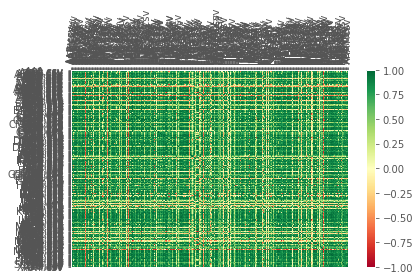

In [80]:
heat_map()